<a href="https://colab.research.google.com/github/rijalsankalp/Handwritten-Devanagari-Character-Recognition/blob/main/training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#print(os.listdir('drive/MyDrive'))

In [ ]:
for_train = "drive/MyDrive/dhcd/train"
for_test = "drive/MyDrive/dhcd/test"


In [2]:
for_train = "../Resource/train"
for_test = "../Resource/test"

In [ ]:
for_train = "../Resource/forAtrain"
for_test = "../Resource/forAtest"

In [3]:
train_x=[]
train_y =[]
val_x = []
val_y =[]
#count = 0

for folder in os.listdir(for_train):
  character_path = for_train + "/" + folder
  for img in os.listdir(character_path):
    #count = count + 1
    #print(count)
    character_img = character_path + "/" + img
    img_arr =  cv2.imread(character_img, cv2.IMREAD_GRAYSCALE)
    img_arr=cv2.resize(img_arr,(32,32))
    #img_arr = cv2.threshold(img_arr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    img_arr=np.array(img_arr)/255.0
    img_arr = img_arr.reshape(32, 32,1)
    train_x.append(img_arr)
    train_y.append(int(str(folder)))


test_y=[]
test_x =[]
for folder in os.listdir(for_test):
  character_path = for_test + "/" + folder
  for img in os.listdir(character_path):
    #count = count + 1
    #print(count)
    character_img = character_path + "/" + img
    img_arr =  cv2.imread(character_img, cv2.IMREAD_GRAYSCALE)
    #img_arr = cv2.threshold(img_arr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    img_arr=cv2.resize(img_arr,(32,32))
    img_arr=np.array(img_arr)/255.0
    img_arr = img_arr.reshape(32, 32,1)
    test_x.append(img_arr)
    test_y.append(int(str(folder)))

In [ ]:
print(len(train_y))
print(len(test_y))

In [ ]:
datatrain=[]
datatest=[]
for i in range(59):
    datatrain.append(0)
    datatest.append(0)

for i in test_y:
    datatest[int(i)]=datatest[int(i)]+1

for i in train_y:
    datatrain[int(i)]=datatrain[int(i)]+1
print(datatrain)
print(datatest)

In [4]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.3, random_state = 40)

In [6]:
print(train_x.shape)

(70210, 32, 32, 1)


In [ ]:
#for #ac (70:30)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.25, random_state = 42)



In [5]:
train_x = np.array(train_x)
val_x = np.array(val_x)
train_y = np.array(train_y)
val_y = np.array(val_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

In [ ]:
#v100.valid.withall
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.Dropout(.2),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer='adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
# bibek ji
pretrained=False
model = keras.models.Sequential([
    keras.layers.Conv2D(128, kernel_size=3, strides=1,  activation='relu', input_shape=(32,32,1), padding='same'),
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.1),
    keras.layers.Conv2D(64, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.1),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.1),
    keras.layers.Conv2D(16, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(16, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.1),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(8, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(8, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.1),
    keras.layers.Conv2D(4, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(4, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.1),

    keras.layers.Conv2D(2, kernel_size=3, strides=1,  activation='relu', padding='same'),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer='adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
#v100.removed 2nd average pooling ##ba
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])


In [ ]:
#v100.changed the 2nd conv matix from 5x5 to 3x3  ##ab
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=3, strides=1, activation='relu', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])

In [ ]:
#v100.removed 2nd average pooling ##ca (70:30)
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])

In [ ]:
#v100.1st conv 7x7 and 2nd con 3x3#da
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=7, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=3, strides=1, activation='relu', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])

In [ ]:
#v100.just fun #ea
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(8, kernel_size=3, strides=1, activation='relu', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])

In [ ]:
#v100.just fun #ea 0-9
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(8, kernel_size=3, strides=1, activation='relu', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

In [ ]:
#v100.nmodel05
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(8, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])

In [ ]:
#v100.nmodel06
model = keras.models.Sequential([
    keras.layers.Conv2D(3, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,1), padding='valid'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(9, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])

In [ ]:
#git1
model=keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt, loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
#git2
model=keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer='adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
#git3
model=keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=5, strides=1,input_shape=(32,32,1), activation='relu'),
    #keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer='adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
#git1
model=keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.Conv2D(128, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.Conv2D(128, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer='adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
#for A

model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5,kernel_regularizer=keras.regularizers.l1(.5), strides=2,  activation='relu', input_shape=(64,64,1), padding='valid'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, kernel_size=7, strides=1, activation='relu', padding='valid'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(60, activation='relu'), 
    keras.layers.Dense(6, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.00005)

model.compile(optimizer=opt, loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:

#git1
model=keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=5, strides=1,input_shape=(32,32,1), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu',padding='same'),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu',padding='same'),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu',padding='same'),
    keras.layers.Conv2D(128, kernel_size=5, strides=1, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, kernel_size=5, strides=1, activation='relu',padding='same'),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer="adam", loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [7]:
#full dataset
model=keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, strides=1,input_shape=(32,32,1), activation='relu', padding='same'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu',padding='same'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu',padding='same'),
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256, kernel_size=3, strides=1, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(59, activation='softmax')
])
model.compile(optimizer="adam", loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
#trial
# def myModel():
#     sizeOfFilter1=(5,5)
#     sizeOfFilter2=(3,3)
#     sizeOfPool=(2,2)
#     model=Sequential()
#     model.add((Conv2D(32,sizeOfFilter2,input_shape=(32,32,1),activation='relu',padding='same')))
#     model.add((Conv2D(32,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((BatchNormalization()))
#     model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((MaxPooling2D()))
#     model.add((Dropout(.2)))
#
#     model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((BatchNormalization()))
#     model.add((Conv2D(128,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((Conv2D(128,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((MaxPooling2D()))
#     model.add((Dropout(.2)))
#
#     model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((BatchNormalization()))
#     model.add((Conv2D(32,sizeOfFilter2,activation='relu',padding='same')))
#     model.add((MaxPooling2D()))
#
#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(7, activation='softmax'))
#     model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#     return model


model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu', input_shape=(32,32,1), padding='same'),
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(.2),

    keras.layers.Conv2D(64, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(.2),

    keras.layers.Conv2D(64, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer='adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
model=keras.models.Sequential([
    # keras.layers.Conv2DTranspose(64,kernel_size=3,strides=1,activation='relu'),
    # keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(32,kernel_size=5,strides=1,activation='relu',input_shape=(32,32,1),padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(64,kernel_size=5,strides=1,activation='relu',padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(61, activation='softmax')
])
model.compile(optimizer='adam',loss= keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 128)        0         
 )                                                      

In [9]:
path=r"C:\Users\Dell\Desktop\HDCRUDNN\sans\Handwritten-Devanagari-Character-Recognition\tensorboard"+f"/NHC-{100}"
model_path=r"C:\Users\Dell\Desktop\HDCRUDNN\sans\Handwritten-Devanagari-Character-Recognition\model\saved_2_final_model.h5"
callbacks=[keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1),
    keras.callbacks.ModelCheckpoint(model_path,monitor="val_loss",save_best_only=True,save_weights_only=False)
]
pretrained=False
if pretrained:
    model=keras.models.load_model(model_path)

In [ ]:
model.get_weights()

In [10]:
history = model.fit(train_x, train_y, epochs=20, batch_size=64,validation_data=(val_x, val_y),callbacks=callbacks)

Epoch 1/20
1098/1098 [==============================] - 167s 151ms/step - loss: 0.8134 - accuracy: 0.7722 - val_loss: 0.1952 - val_accuracy: 0.9414
Epoch 2/20
1098/1098 [==============================] - 162s 147ms/step - loss: 0.1898 - accuracy: 0.9425 - val_loss: 0.1367 - val_accuracy: 0.9602
Epoch 3/20
1098/1098 [==============================] - 163s 149ms/step - loss: 0.1357 - accuracy: 0.9595 - val_loss: 0.0983 - val_accuracy: 0.9708
Epoch 4/20
1098/1098 [==============================] - 166s 151ms/step - loss: 0.1031 - accuracy: 0.9684 - val_loss: 0.0999 - val_accuracy: 0.9728
Epoch 5/20
1098/1098 [==============================] - 161s 147ms/step - loss: 0.0858 - accuracy: 0.9732 - val_loss: 0.0887 - val_accuracy: 0.9746
Epoch 6/20
1098/1098 [==============================] - 163s 148ms/step - loss: 0.0875 - accuracy: 0.9729 - val_loss: 0.0791 - val_accuracy: 0.9778
Epoch 7/20
1098/1098 [==============================] - 160s 146ms/step - loss: 0.0626 - accuracy: 0.9804 - val_

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=16, validation_data=(val_x, val_y))

In [11]:
history.history['accuracy']
x=[i for i in range(1,21)]

C:\Users\Dell\AppData\Local\Temp/ipykernel_10324/996363499.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('full59bestaccuracy.jpg',dip=300,bbox_inches='tight')


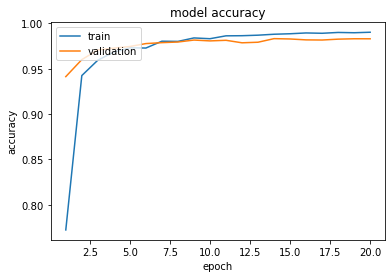

In [12]:
plt.plot(x,history.history['accuracy'])
plt.plot(x,history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('full59bestaccuracy.jpg',dip=300,bbox_inches='tight')
plt.show()


C:\Users\Dell\AppData\Local\Temp/ipykernel_10324/1158269680.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('full59bestloss.jpg',dip=300,bbox_inches='tight')


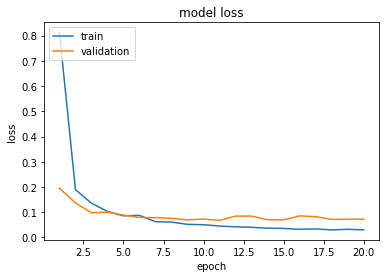

In [13]:
plt.plot(x,history.history['loss'])
plt.plot(x,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('full59bestloss.jpg',dip=300,bbox_inches='tight')
plt.show()

In [14]:
model.evaluate(test_x, test_y)

554/554 [==============================] - 9s 16ms/step - loss: 0.0864 - accuracy: 0.9808


[0.08636879920959473, 0.9807876944541931]

In [15]:
model.save('bestest', save_format="h5")

In [17]:
ldmodel=keras.models.load_model("model/saved_2_final_model.h5")

In [18]:
ldmodel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 128)        0         
 )                                                      

In [19]:
ldmodel.evaluate(test_x, test_y)

554/554 [==============================] - 9s 16ms/step - loss: 0.0682 - accuracy: 0.9814


[0.06824057549238205, 0.9814092516899109]

In [ ]:
history = ldmodel.fit(train_x, train_y, epochs=10, batch_size=8, validation_data=(val_x, val_y))

In [ ]:
#confusionMAtrix   

In [20]:
y_predict=ldmodel.predict(test_x)
y_value=[]
for a in y_predict:
    y_value.append(np.argmax(a))

In [21]:
print(test_y)
print(y_value)

[0 0 0 ... 9 9 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [22]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [27]:
cm_class=[]
for i in range(59):
  cm_class.append(i)

(<Figure size 1800x1800 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

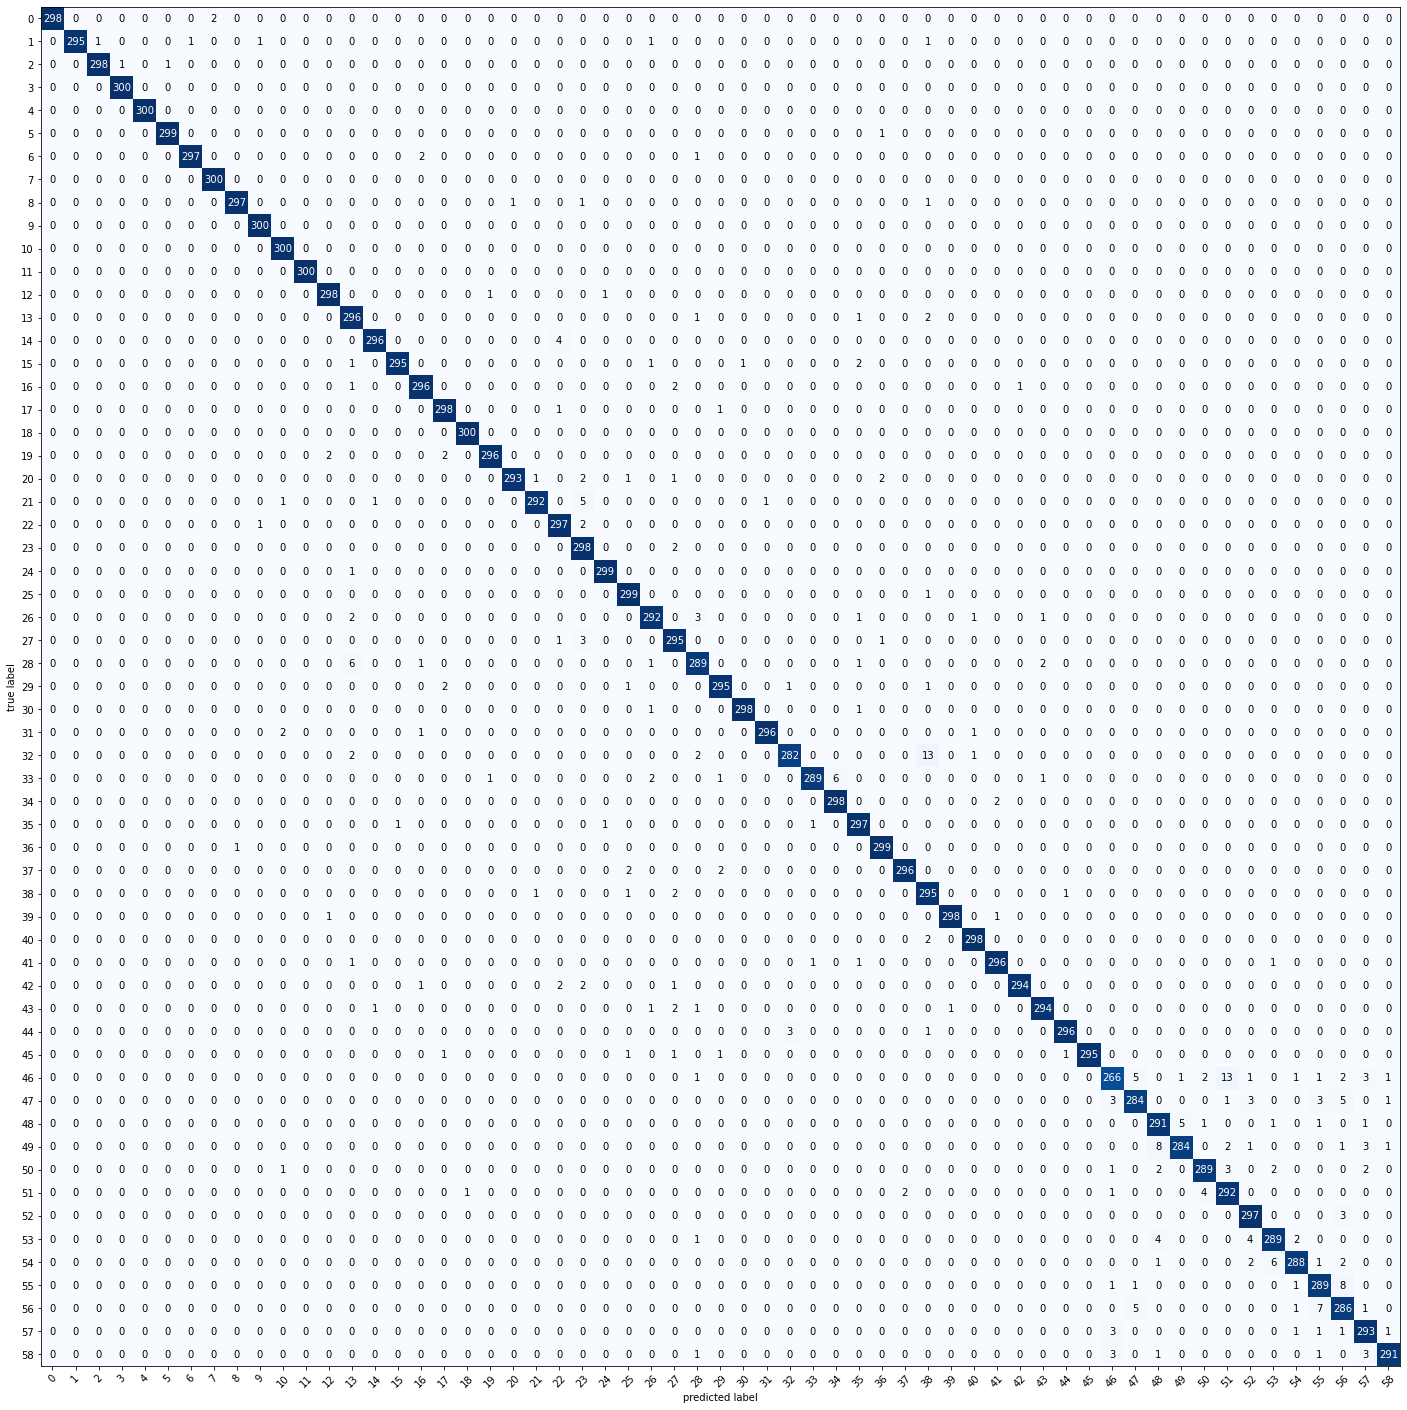

In [42]:
mat=confusion_matrix(test_y,y_value)
plot_confusion_matrix(conf_mat=mat,figsize=(25,25),class_names=cm_class)
# plt.savefig("Newconfusion.jpg")

In [40]:
print(mat.transpose())
print(mat)

[[298   0   0 ...   0   0   0]
 [  0 295   0 ...   0   0   0]
 [  0   1 298 ...   0   0   0]
 ...
 [  0   0   0 ... 286   1   0]
 [  0   0   0 ...   1 293   3]
 [  0   0   0 ...   0   1 291]]
[[298   0   0 ...   0   0   0]
 [  0 295   1 ...   0   0   0]
 [  0   0 298 ...   0   0   0]
 ...
 [  0   0   0 ... 286   1   0]
 [  0   0   0 ...   1 293   1]
 [  0   0   0 ...   0   3 291]]


In [29]:
#model accuracy
calc_accuracy=(np.diagonal(mat).sum()/mat.sum().sum())
print(calc_accuracy)

0.9814092784087699


In [37]:
#accuracy as per class
TP=mat[0,0]
print(TP)

298


In [43]:
import pandas as pd

In [47]:
import pandas as pd
import seaborn as sn

#y_true ma tapaiko test_y pataunus ani y_predicte test_x predict garda j auxa tyo patanus both 1D array ho haii
def plot(y_true,y_pred): 
    labels=cm_class# array of classname yours goona be [5,10,20,50,100,500,1000]
    columns=[f'Actual{label}'for label in labels]
    index=[f'Predicated{label}'for label in labels]
    table=pd.DataFrame(confusion_matrix(y_true,y_pred).transpose(),columns=columns,index=index)
    return table


,Actual0,Actual1,Actual2,Actual3,Actual4,Actual5,Actual6,Actual7,Actual8,Actual9,...,Actual49,Actual50,Actual51,Actual52,Actual53,Actual54,Actual55,Actual56,Actual57,Actual58
Predicated0,298,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated1,0,295,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated2,0,1,298,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated3,0,0,1,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated4,0,0,0,0,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated5,0,0,1,0,0,299,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated6,0,1,0,0,0,0,297,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated7,2,0,0,0,0,0,0,300,0,0,...,0,0,0,0,0,0,0,0,0,0
Predicated8,0,0,0,0,0,0,0,0,297,0,...,0,0,0,0,0,0,0,0,0,0
Predicated9,0,1,0,0,0,0,0,0,0,300,...,0,0,0,0,0,0,0,0,0,0


In [59]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

#y_true ma tapaiko test_y pataunus ani y_predicte test_x predict garda j auxa tyo patanus both 1D array ho haii
def plot(y_true,y_pred): 
    labels=cm_class# array of classname yours goona be [5,10,20,50,100,500,1000]
    columns=[f'Actual{label}'for label in labels]
    index=[f'Predicated{label}'for label in labels]
    table=pd.DataFrame(confusion_matrix(y_true,y_pred).transpose(),columns=columns,index=index)
    plt.figure(figsize=(25,25))
    return sn.heatmap(table,annot=True,fmt='d',cmap="Blues",linewidths=.5)

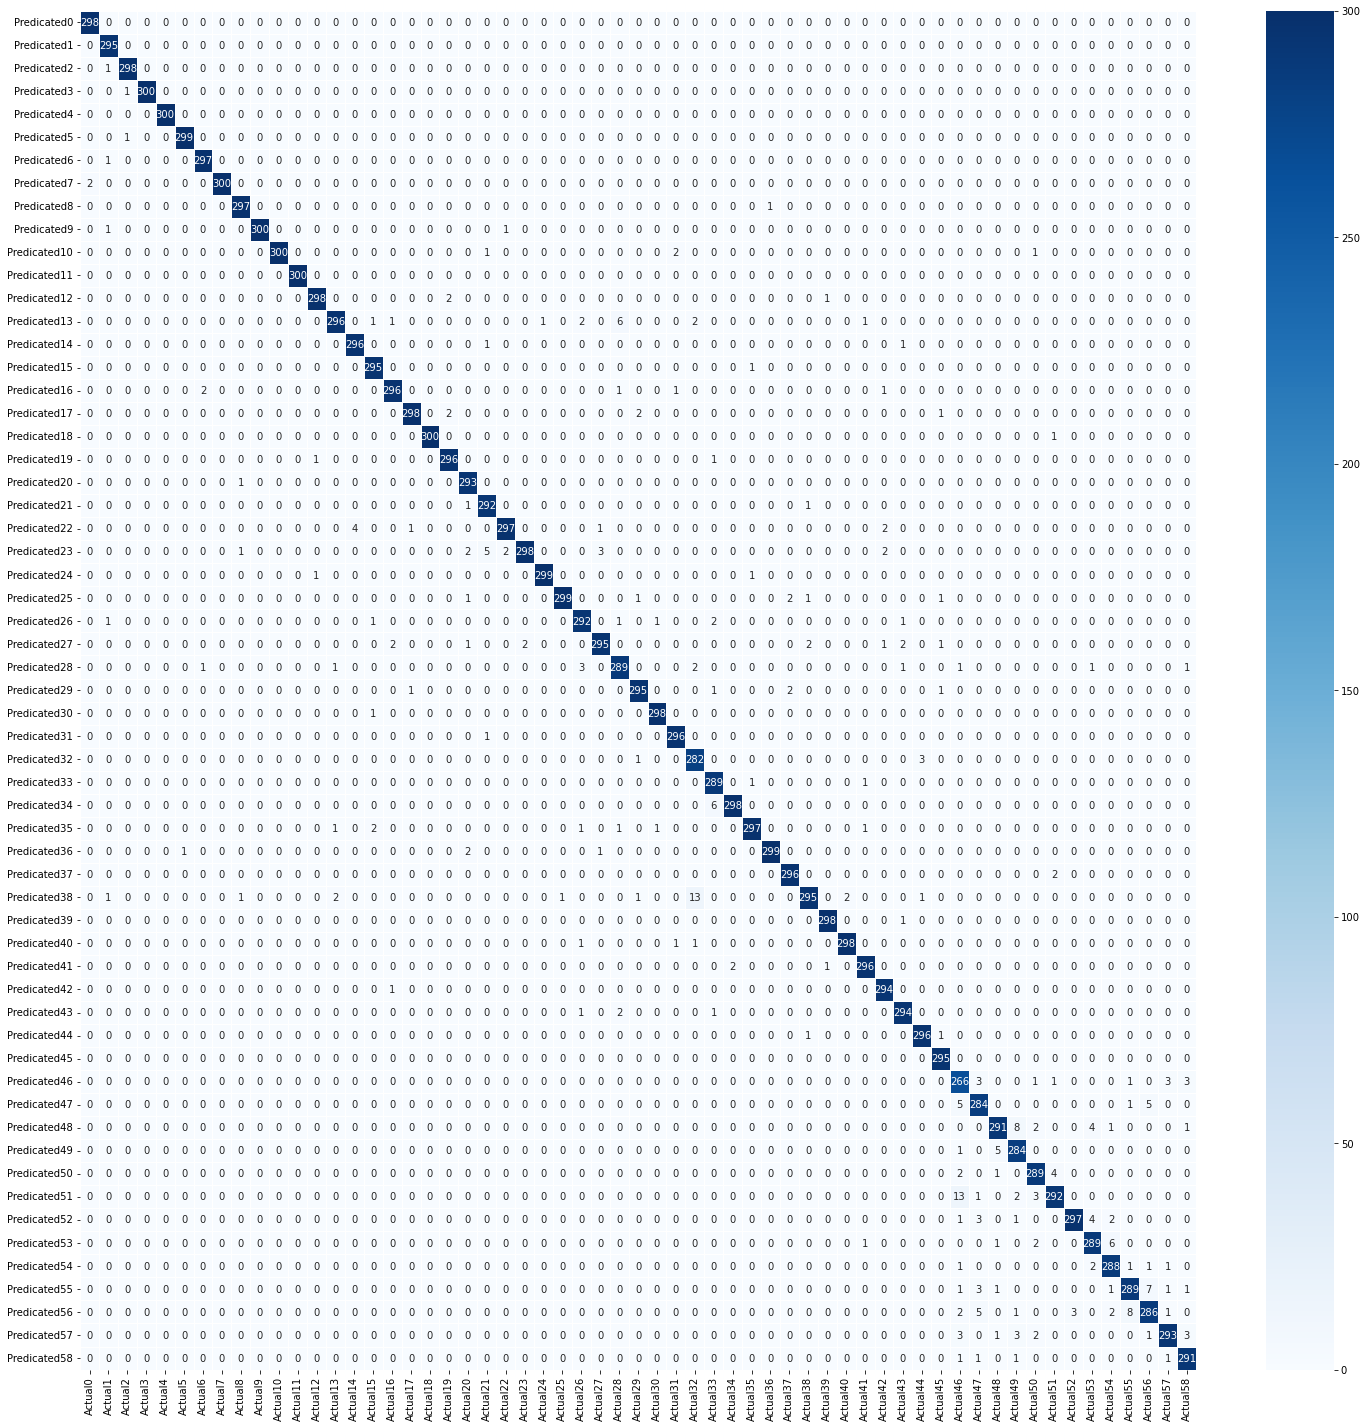

In [60]:
plot(test_y,y_value)
plt.savefig("why.jpg")

In [79]:
from sklearn.metrics import classification_report
lol=classification_report(test_y,y_value)
x=lol.split('\n')
big=[]
pls=[]
for i in x:
    pls=i.split()
    big.append(pls)
print(big)


[['precision', 'recall', 'f1-score', 'support'], [], ['0', '1.00', '0.99', '1.00', '300'], ['1', '1.00', '0.98', '0.99', '300'], ['2', '1.00', '0.99', '0.99', '300'], ['3', '1.00', '1.00', '1.00', '300'], ['4', '1.00', '1.00', '1.00', '300'], ['5', '1.00', '1.00', '1.00', '300'], ['6', '1.00', '0.99', '0.99', '300'], ['7', '0.99', '1.00', '1.00', '300'], ['8', '1.00', '0.99', '0.99', '300'], ['9', '0.99', '1.00', '1.00', '300'], ['10', '0.99', '1.00', '0.99', '300'], ['11', '1.00', '1.00', '1.00', '300'], ['12', '0.99', '0.99', '0.99', '300'], ['13', '0.95', '0.99', '0.97', '300'], ['14', '0.99', '0.99', '0.99', '300'], ['15', '1.00', '0.98', '0.99', '300'], ['16', '0.98', '0.99', '0.99', '300'], ['17', '0.98', '0.99', '0.99', '300'], ['18', '1.00', '1.00', '1.00', '300'], ['19', '0.99', '0.99', '0.99', '300'], ['20', '1.00', '0.98', '0.99', '300'], ['21', '0.99', '0.97', '0.98', '300'], ['22', '0.97', '0.99', '0.98', '300'], ['23', '0.95', '0.99', '0.97', '300'], ['24', '0.99', '1.00'

AttributeError: 'list' object has no attribute 'to_csv'

In [82]:
import csv
with open('gfg.csv','w',newline='') as f:
    write=csv.writer(f)
    write.writerows(big)